In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Import CSV file as DataFrame. Drop the incomplete first loop with index -1

In [101]:
joint_positions = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230120_160632')
joint_positions.drop(joint_positions[joint_positions['loop_count']==-1].index, inplace=True)

Range of the loops

In [102]:
(joint_positions['loop_count'].min(), joint_positions['loop_count'].max())

(61, 177)

Plot the joint angles

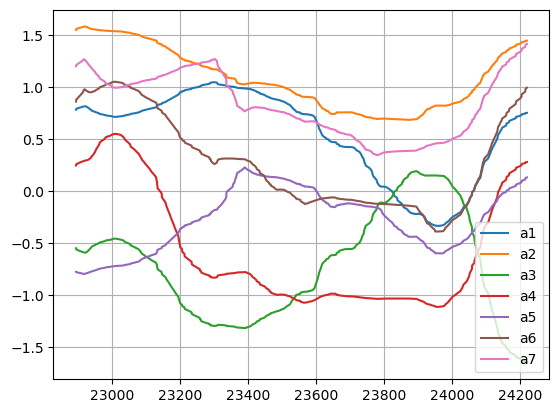

In [103]:
fig, ax = plt.subplots()
for joint in joint_positions.columns[3:]:
    ax.plot(joint_positions[joint].loc[joint_positions['loop_count']==75], label=joint)
#ax.plot(joint_positions['a1'], label='a1')
ax.legend()
ax.grid()

absolute values of joint angles

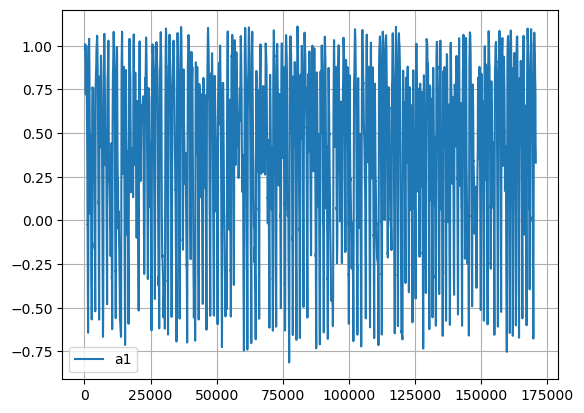

In [104]:
fig, ax = plt.subplots()
ax.plot(joint_positions['a1'], label='a1')
ax.legend()
ax.grid()

mean

In [105]:
joint_positions[joint_positions.columns[3:]].mean()

a1    0.393311
a2    1.003569
a3   -0.188855
a4   -0.682294
a5    0.084571
a6   -0.064852
a7    0.079525
dtype: float64

std deviation

In [106]:
joint_positions[joint_positions.columns[3:]].std()

a1    0.484452
a2    0.225194
a3    0.709219
a4    0.478719
a5    0.594688
a6    0.499177
a7    0.944818
dtype: float64